In [1]:
import tensorflow as tf
import keras
import wandb

from model import Model
from dataLoader import PlantDiseaseDataLoader

In [2]:
height, width = 75, 75
data = PlantDiseaseDataLoader(width=width, modes=["full"], verbose=True)
data.loadDataset(drop_out=0)
class_names = data.get_class_names()[0]

DataLoader initialized with:
src_dir: /Users/janduchscherer/ml_survive/PlantVillage-Dataset/raw/segmented
width: 75
height: 75
mode: ['full']
Num GPUs Available:  0
Loaded 54306 images


In [3]:
X_Train, X_Valid, X_Test, y_Train, y_Valid, y_Test = data.getSplitDataset()
y_Train = y_Train[:,0]
y_Valid = y_Valid[:,0]
y_Test = y_Test[:,0]

Dict{dir_name: label_name}:
 {'Apple___Apple_scab': 'Apple___Apple_scab', 'Apple___Black_rot': 'Apple___Black_rot', 'Apple___Cedar_apple_rust': 'Apple___Cedar_apple_rust', 'Apple___healthy': 'Apple___healthy', 'Blueberry___healthy': 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew': 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy': 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_': 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight': 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy': 'Corn_(maize)___healthy', 'Grape___Black_rot': 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)': 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy': 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)': 'O

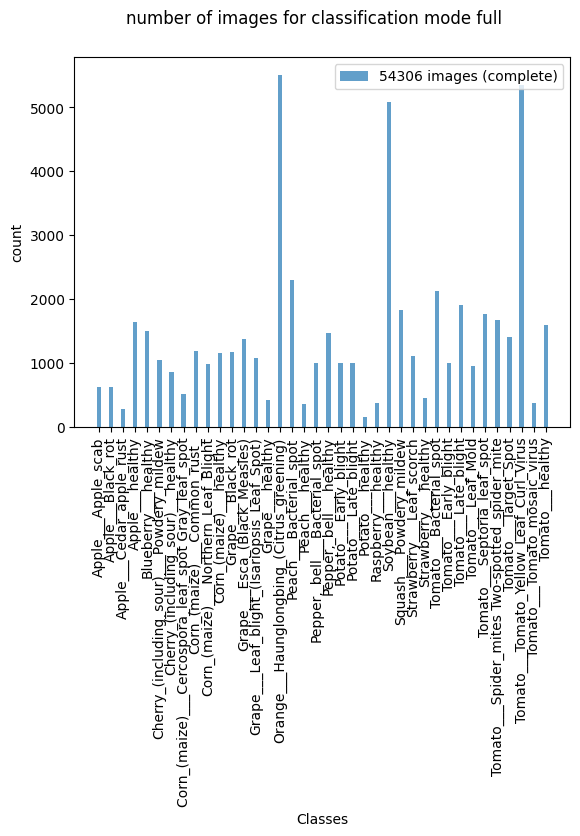

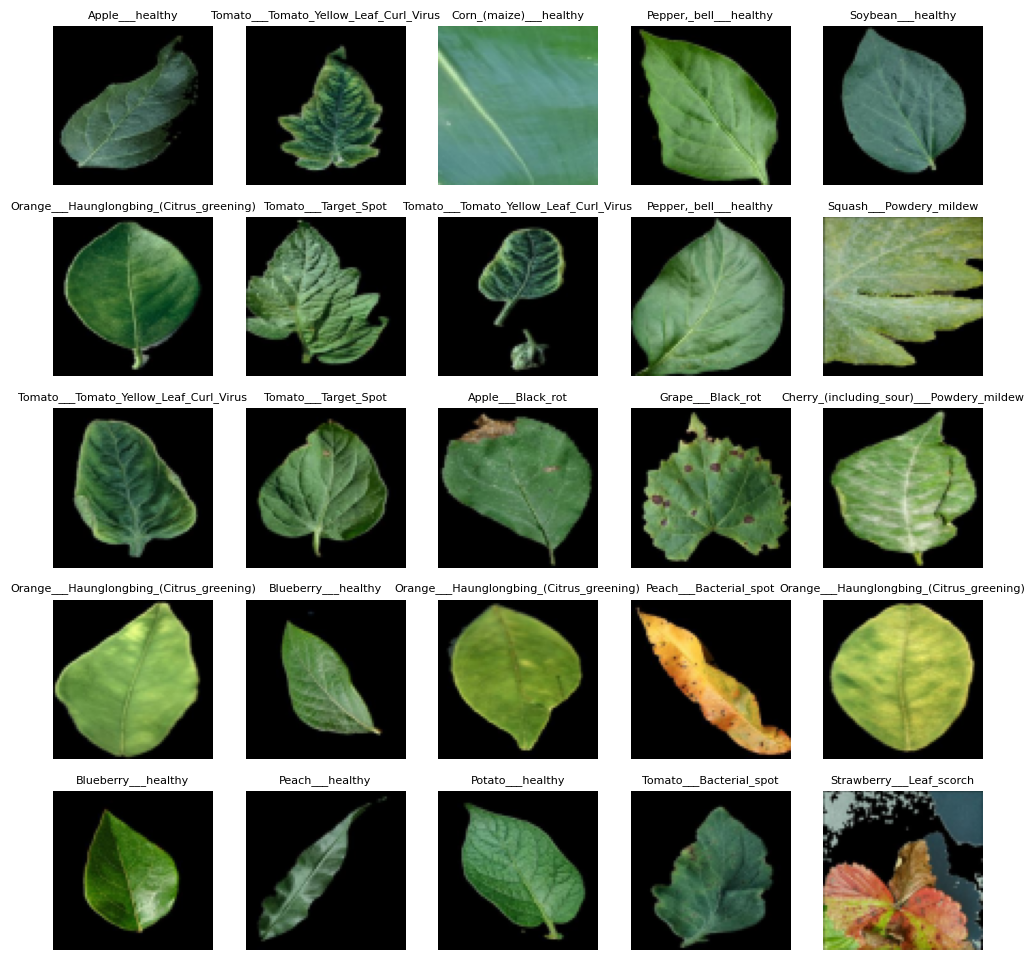

In [4]:
mean, scale = data.get_mean_scale()
data.plot_data_statistics()

In [6]:

# run = wandb.init()
# artifact = run.use_artifact('hm-muc/ml_survive/run_2wxoe7ng_model:v17', type='model')
# artifact_dir = artifact.download()
wandb.init()
M_full = Model(75, 75, "InceptionV3", n_classes=38, class_names=[])
M_full.model = keras.models.load_model("artifacts/run_2wxoe7ng_model:v17")
print(M_full.model.summary())
# y_pred = M_full.test_model(X_Test, y_Test)


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 75, 75, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 37, 37, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 37, 37, 32)  96          ['conv2d[0][0]']                 
 alization)                                                                                       
                                                                                                  
 activation (Activation)        (None, 37, 37, 32)   0           ['batch_normalization[0][0]']

In [ ]:
from helpers import plot_confusion_matrix, show_classified_samples
plot_confusion_matrix(y_pred, y_Test, class_names, normalize=True)
show_classified_samples(X_Test, y_Test, y_pred, class_names, mean, scale)